In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# Load data
data = pd.read_csv('BTC-USD.csv', parse_dates=['Date'], index_col='Date')
prices = data['Close'].values.reshape(-1, 1)

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

In [ ]:
# Split the data into training and testing sets
train_size = int(0.8 * len(prices_scaled))
train_data = prices_scaled[:train_size]
test_data = prices_scaled[train_size:]

In [ ]:
# Define a function to create data sequences for the GRU model
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [ ]:
# Create sequences of data for the GRU model
seq_length = 30
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
# Define and train the GRU model
model = Sequential()
model.add(GRU(128, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(GRU(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
77/77 [==============================] - 9s 68ms/step - loss: 0.0060
Epoch 2/50
77/77 [==============================] - 4s 48ms/step - loss: 0.0010
Epoch 3/50
77/77 [==============================] - 4s 55ms/step - loss: 9.7114e-04
Epoch 4/50
77/77 [==============================] - 6s 81ms/step - loss: 0.0010
Epoch 5/50
77/77 [==============================] - 7s 94ms/step - loss: 8.7371e-04
Epoch 6/50
77/77 [==============================] - 5s 71ms/step - loss: 8.1682e-04
Epoch 7/50
77/77 [==============================] - 7s 97ms/step - loss: 8.8706e-04
Epoch 8/50
77/77 [==============================] - 5s 71ms/step - loss: 8.1112e-04
Epoch 9/50
77/77 [==============================] - 5s 69ms/step - loss: 7.0377e-04
Epoch 10/50
77/77 [==============================] - 5s 61ms/step - loss: 6.7585e-04
Epoch 11/50
77/77 [==============================] - 4s 57ms/step - loss: 7.3759e-04
Epoch 12/50
77/77 [==============================] - 4s 53ms/step - loss: 7.9055e-04
E

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

19/19 [==============================] - 1s 13ms/step


In [ ]:
# Inverse scale the predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Calculate metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

In [ ]:
# Print metrics
print('GRU Model Metrics:')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R^2 Score: {r2:.4f}')

GRU Model Metrics:
Mean Squared Error: 2003410.5678
Root Mean Squared Error: 1415.4189
Mean Absolute Error: 1030.3697
R^2 Score: 0.9899


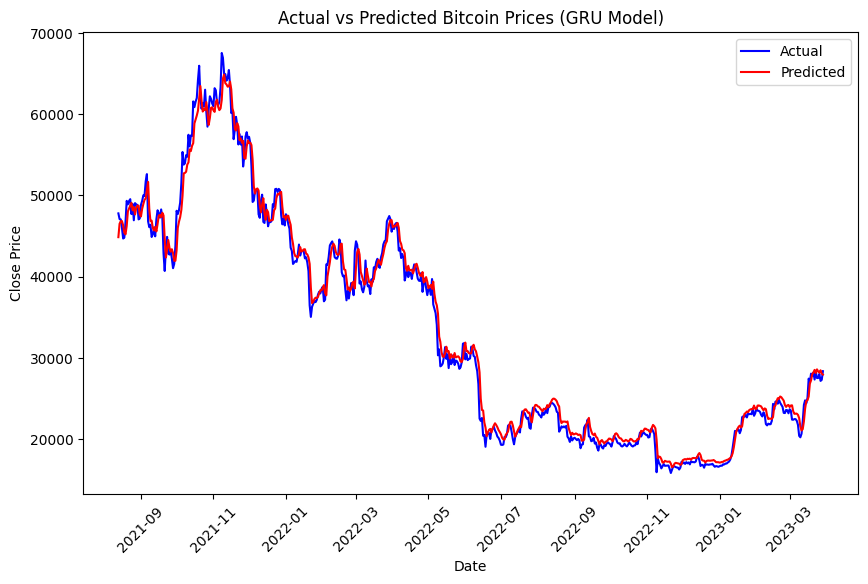

In [ ]:
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data.index[train_size+seq_length:], y_test_inv, color='blue', label='Actual')
ax.plot(data.index[train_size+seq_length:], y_pred_inv, color='red', label='Predicted')
ax.set_title('Actual vs Predicted Bitcoin Prices (GRU Model)')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.legend(loc='best')
plt.xticks(rotation=45)
plt.savefig('BTC-GRU.png')
plt.show()